In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

import os
import sys
sys.path.append(os.path.abspath("../Notebooks"))
from helper_functions import  *

In [ ]:
# Read compressed csv with built-in gzip support
df_recipes = decompress_pickle('../Data/file4.pbz2') 
df_ingredients = pd.read_csv('../Data/ingredients_with_recipies.csv')

Create a graph

In [ ]:
from tqdm import tqdm
#Define a dictionary for every ingredient with a list of recipes


ing_dict = { id: [] for id in df_ingredients['id'].unique()} #as we are not taking all of the recipes some list will be empty at the end


for idx, row in tqdm(df_recipes.iterrows()): 
    #
    for ingredient in row['ingredient_ids']:
        ing_dict[ingredient].append(row['id'])

In [14]:
#Needs to be finished
from itertools import combinations
    
edges = [(x,y, {"ingredient": key})  for key in ing_dict for x, y in list(combinations(ing_dict[key], 2))]   

# All possible pairs in List
# Using combinations()


In [25]:
#!pip install networkx
import networkx as nx

G = nx.MultiDiGraph()
G.add_nodes_from(df_recipes['id'].values, name=df_recipes['name'].values, n_ingredients=df_recipes['n_ingredients'].values)
print(G)

G.add_edges_from(edges)
print(G)

MultiDiGraph with 178265 nodes and 14699952 edges


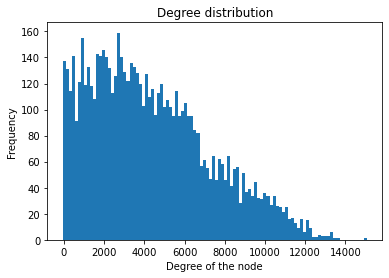

Slope of distribution: -0.01890041029842691


In [28]:

# In and out degree distributions & slope estimate(W5)
def plot_deg_dist(G, title = str):

    degree_list = [val for (node, val) in G.degree() if val != 0]

    counts, edges = np.histogram(degree_list, bins = 100)
    plt.bar(edges[:-1], counts, width=np.diff(edges))
    plt.title(title)
    plt.xlabel('Degree of the node')
    plt.ylabel('Frequency')
    plt.show()
    idx = np.isfinite(np.log(edges[:10])) & np.isfinite(np.log(counts[:10]))
    slope, intercept = np.polyfit(np.log(edges[:10])[idx], np.log(counts[:10])[idx], 1)
    print(f'Slope of distribution: {slope}')

plot_deg_dist(G, title = 'Degree distribution')  
    

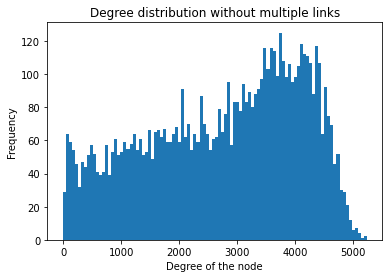

Slope of distribution: 0.08060538198018356


In [29]:
G2 = nx.Graph(G)
plot_deg_dist(G2, title = 'Degree distribution without multiple links')  